# Analysis

Analysis file for ABM assessment 1

In [1]:
# load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
# load results

path = os.path.join('models', 'outputs')

# metab-vision-pop variant
s2_mvp = pd.read_csv(
    os.path.join(path, 'Sugarscape 2 Constant Growback_edit metab_vision_pop-table.csv'),
    skiprows = 6
)

s3_mvp = pd.read_csv(
    os.path.join(path, 'Sugarscape 3 Wealth Distribution_edit metab-vision-pop-table.csv'),
    skiprows = 6
)


In [13]:
s2_mvp

,[run number],initial-population,max-metabolism,max-vision,[step],count turtles,survival-rate,last-death,gini-index,mean [vision] of turtles,mean [metabolism] of turtles
0,2,200,2,2,126,164,0.820000,24,0.286893,1.536585,1.469512
1,4,400,2,2,126,317,0.792500,24,0.314200,1.479495,1.473186
2,5,500,2,2,126,395,0.790000,24,0.344369,1.526582,1.440506
3,6,600,2,2,126,481,0.801667,24,0.374955,1.521830,1.434511
4,11,100,4,2,146,56,0.560000,44,0.349497,1.446429,1.714286
...,...,...,...,...,...,...,...,...,...,...,...
1245,1208,800,2,10,862,696,0.870000,760,0.416964,6.093391,1.416667
1246,1247,700,10,10,271,183,0.261429,169,0.387130,6.021858,1.972678
1247,1250,1000,10,10,267,235,0.235000,165,0.398700,5.970213,1.855319
1248,1249,900,10,10,339,224,0.248889,237,0.378720,5.705357,1.866071


In [14]:
s3_mvp

,[run number],initial-population,max-vision,max-metabolism,[step],count turtles,survival-rate,gini-index,mean [vision] of turtles,mean [metabolism] of turtles
0,7,100,2,4,500,100,0.544218,0.510156,1.560,1.970
1,8,100,2,4,500,100,0.531811,0.531409,1.570,2.140
2,6,100,2,4,500,100,0.529695,0.481036,1.520,1.990
3,5,100,2,2,500,100,0.811765,0.442406,1.500,1.390
4,2,100,2,2,500,100,0.756579,0.490606,1.580,1.480
...,...,...,...,...,...,...,...,...,...,...
1245,1246,1000,10,10,500,1000,0.116119,0.465765,5.906,2.291
1246,1248,1000,10,10,500,1000,0.118166,0.471828,5.701,2.302
1247,1247,1000,10,10,500,1000,0.117692,0.468497,5.805,2.342
1248,1249,1000,10,10,500,1000,0.115355,0.472637,5.783,2.292


## Analysis on the impact of factors on survival rate and gini index

First, we will look at each model separately. Consider which factors do influence the survival rate and the Gini Index (inequality index)



In [15]:
# extract required columns
columns = ['max-vision', 'max-metabolism', 'initial-population', 'count turtles', 'survival-rate', 'gini-index']

s2_mvp_plot = s2_mvp[columns].copy()
s3_mvp_plot = s3_mvp[columns].copy()

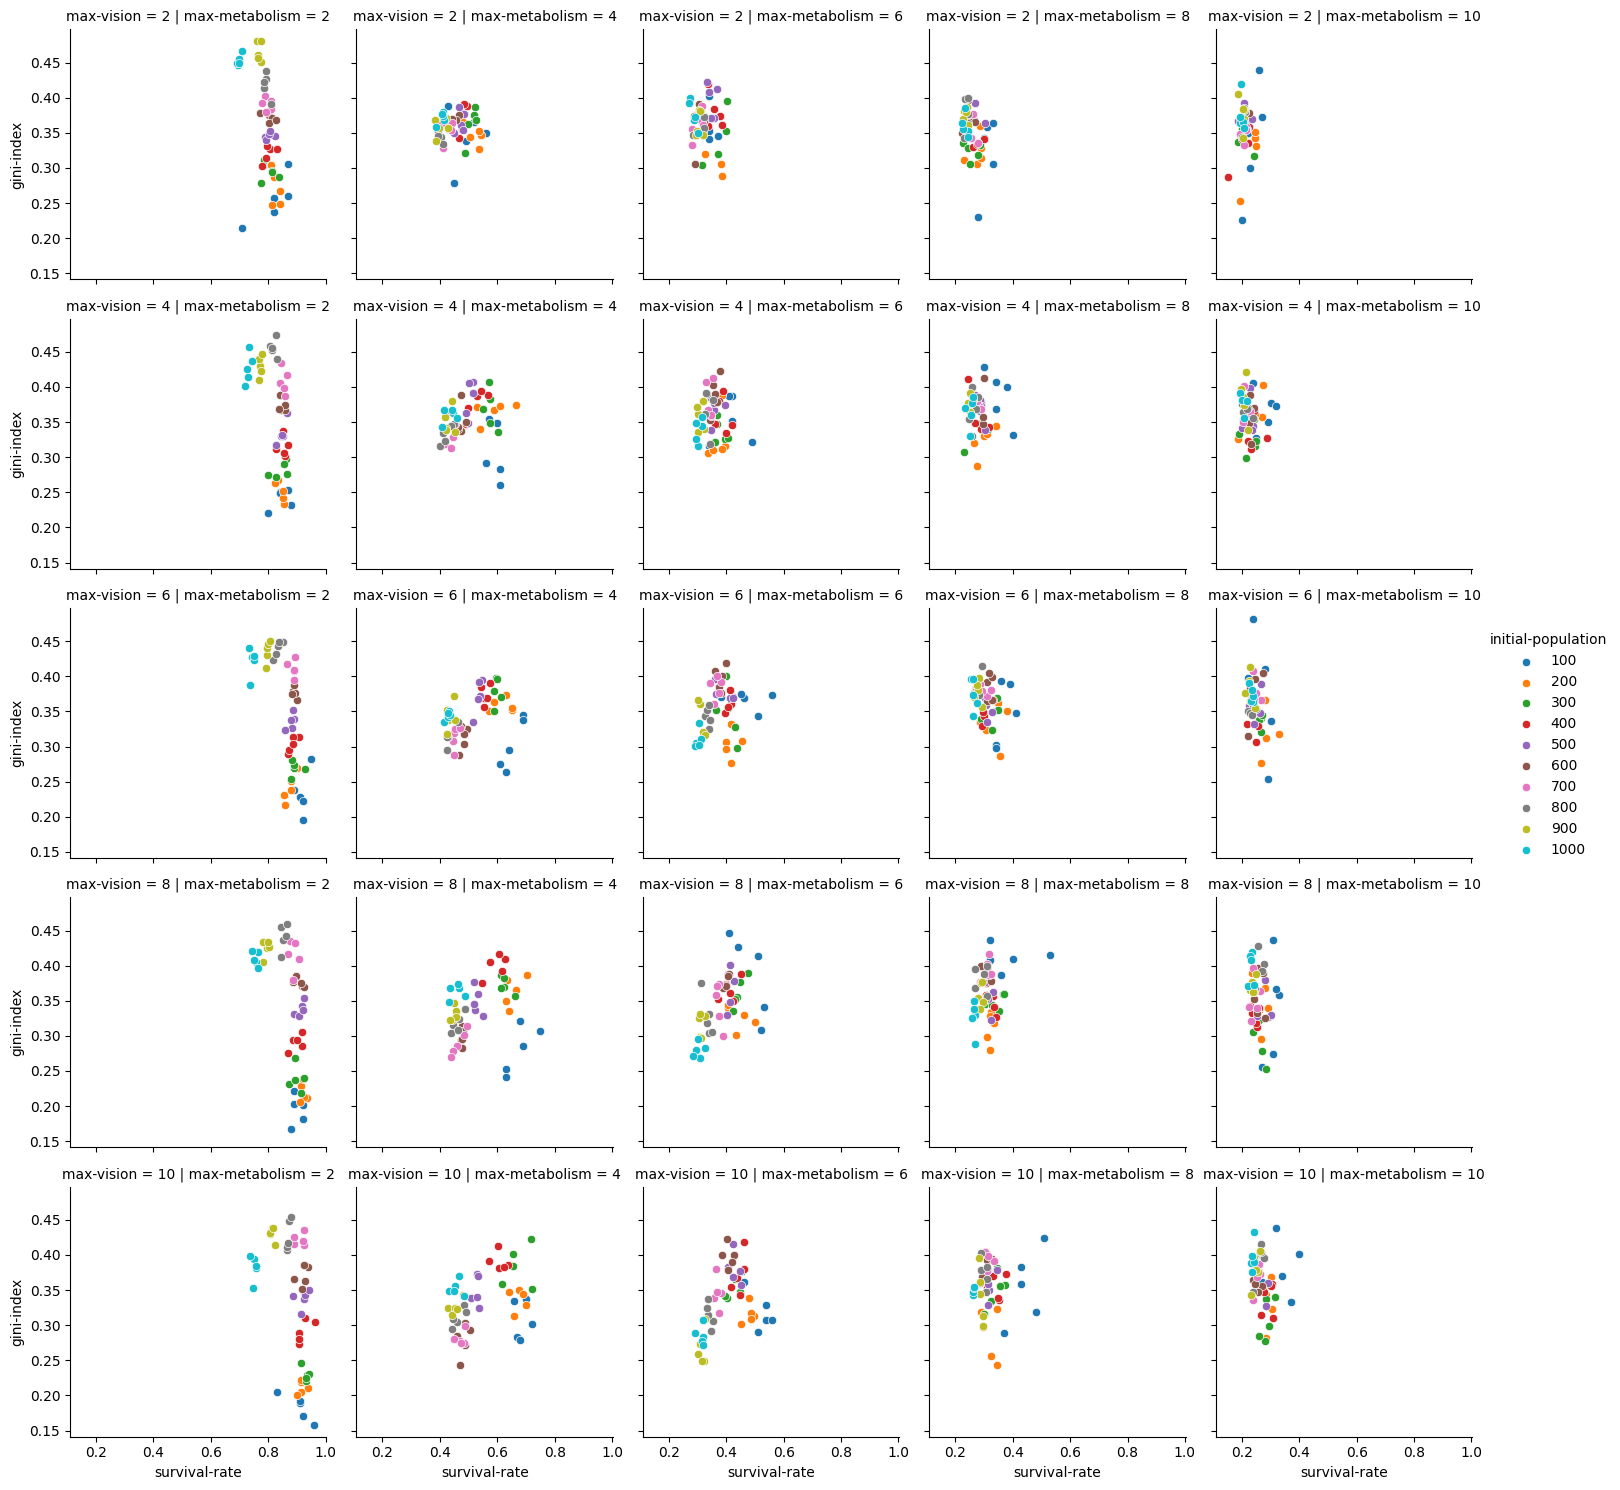

In [16]:
# create plot for s2

# init grid
s2_plot = sns.FacetGrid(
    s2_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population'
)

# create scatter plot
s2_plot.map(
    sns.scatterplot,
    'survival-rate',
    'gini-index'    
)

# add legend
s2_plot.add_legend()

# show plot
plt.show()


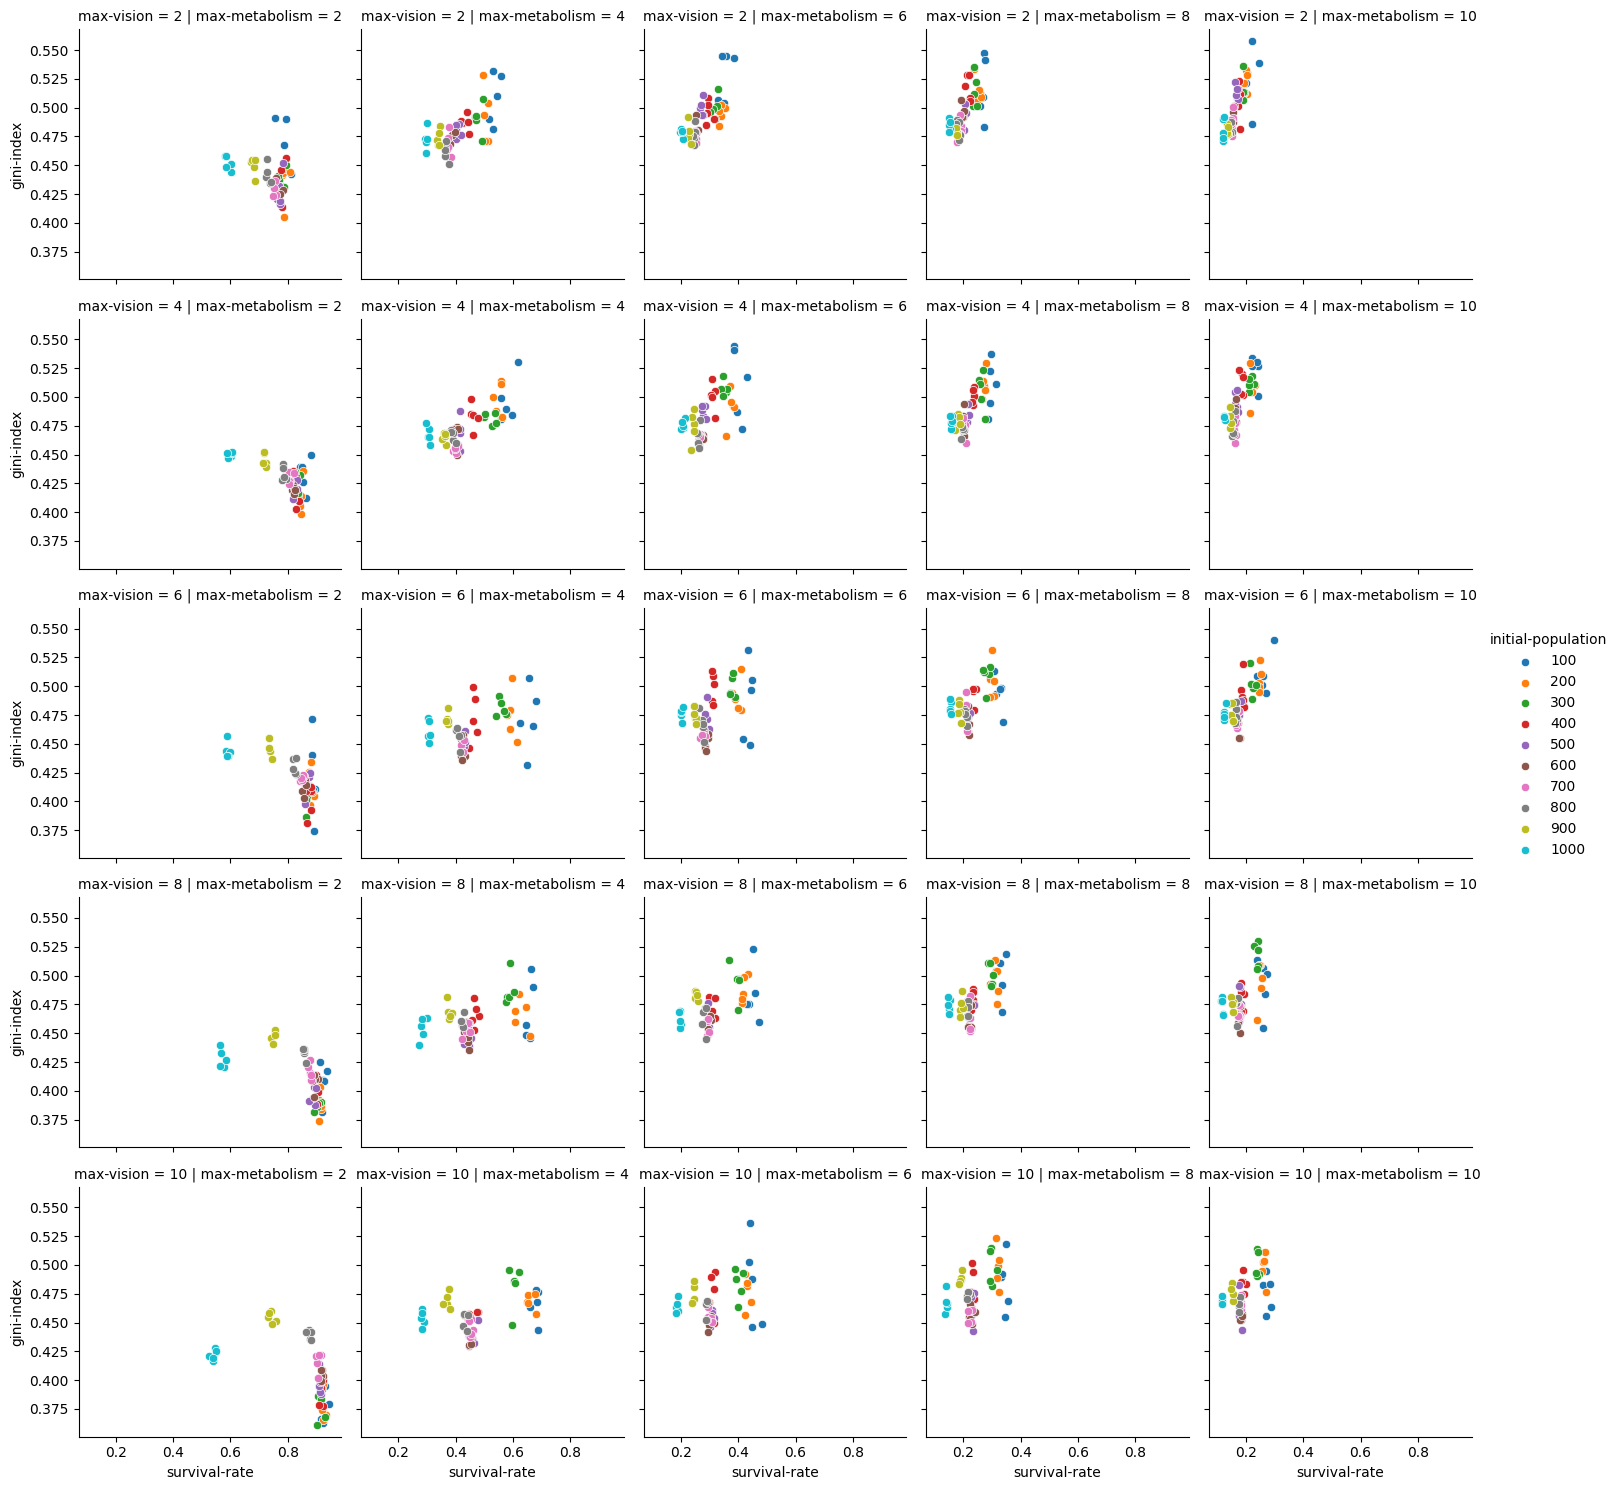

In [17]:
# create plot for s3

# init grid
s3_plot = sns.FacetGrid(
    s3_mvp_plot,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population'
)

# create scatter plot
s3_plot.map(
    sns.scatterplot,
    'survival-rate',
    'gini-index'    
)

# add legend
s3_plot.add_legend()

# show plot
plt.show()


In [18]:
# insert column showing model
s2_mvp_plot.insert(0, column = 'model', value = 'Constant Growback')
s3_mvp_plot.insert(0, column = 'model', value = 'Wealth Distribution')

# combine dataframe
combined_df = pd.concat([s2_mvp_plot, s3_mvp_plot])

In [19]:
combined_df

,model,max-vision,max-metabolism,initial-population,count turtles,survival-rate,gini-index
0,Constant Growback,2,2,200,164,0.820000,0.286893
1,Constant Growback,2,2,400,317,0.792500,0.314200
2,Constant Growback,2,2,500,395,0.790000,0.344369
3,Constant Growback,2,2,600,481,0.801667,0.374955
4,Constant Growback,2,4,100,56,0.560000,0.349497
...,...,...,...,...,...,...,...
1245,Wealth Distribution,10,10,1000,1000,0.116119,0.465765
1246,Wealth Distribution,10,10,1000,1000,0.118166,0.471828
1247,Wealth Distribution,10,10,1000,1000,0.117692,0.468497
1248,Wealth Distribution,10,10,1000,1000,0.115355,0.472637


## Comparison of results when considering reproduction

How does the paerformance of the model change if we consider reproduction?

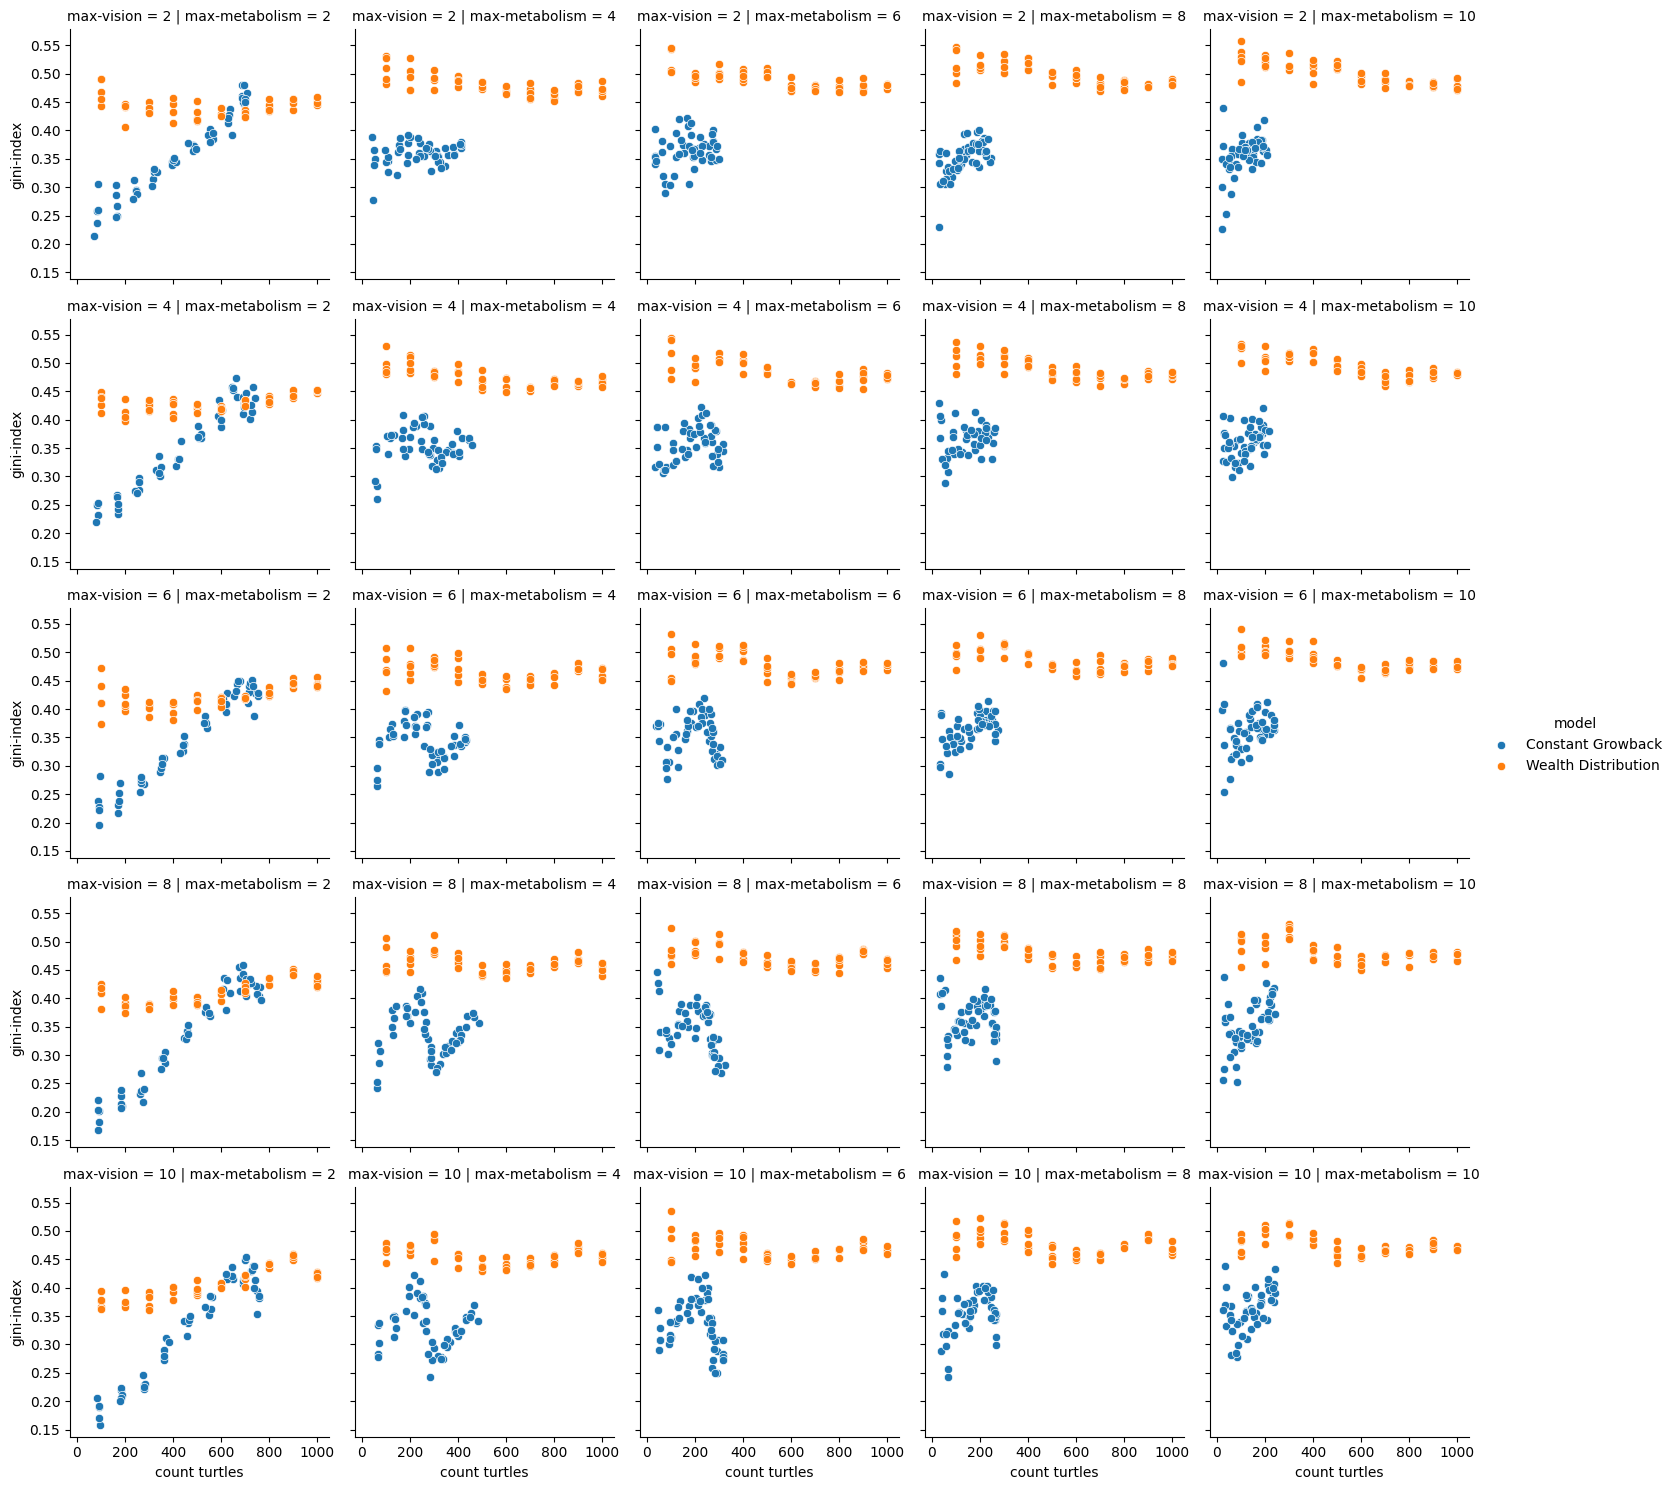

In [20]:
# create gini plot for combined

# init grid
combined_gini_plot = sns.FacetGrid(
    combined_df,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'model'
)

# create scatter plot
combined_gini_plot.map(
    sns.scatterplot,
    'count turtles',
    'gini-index'    
)

# add legend
combined_gini_plot.add_legend()

# show plot
plt.show()


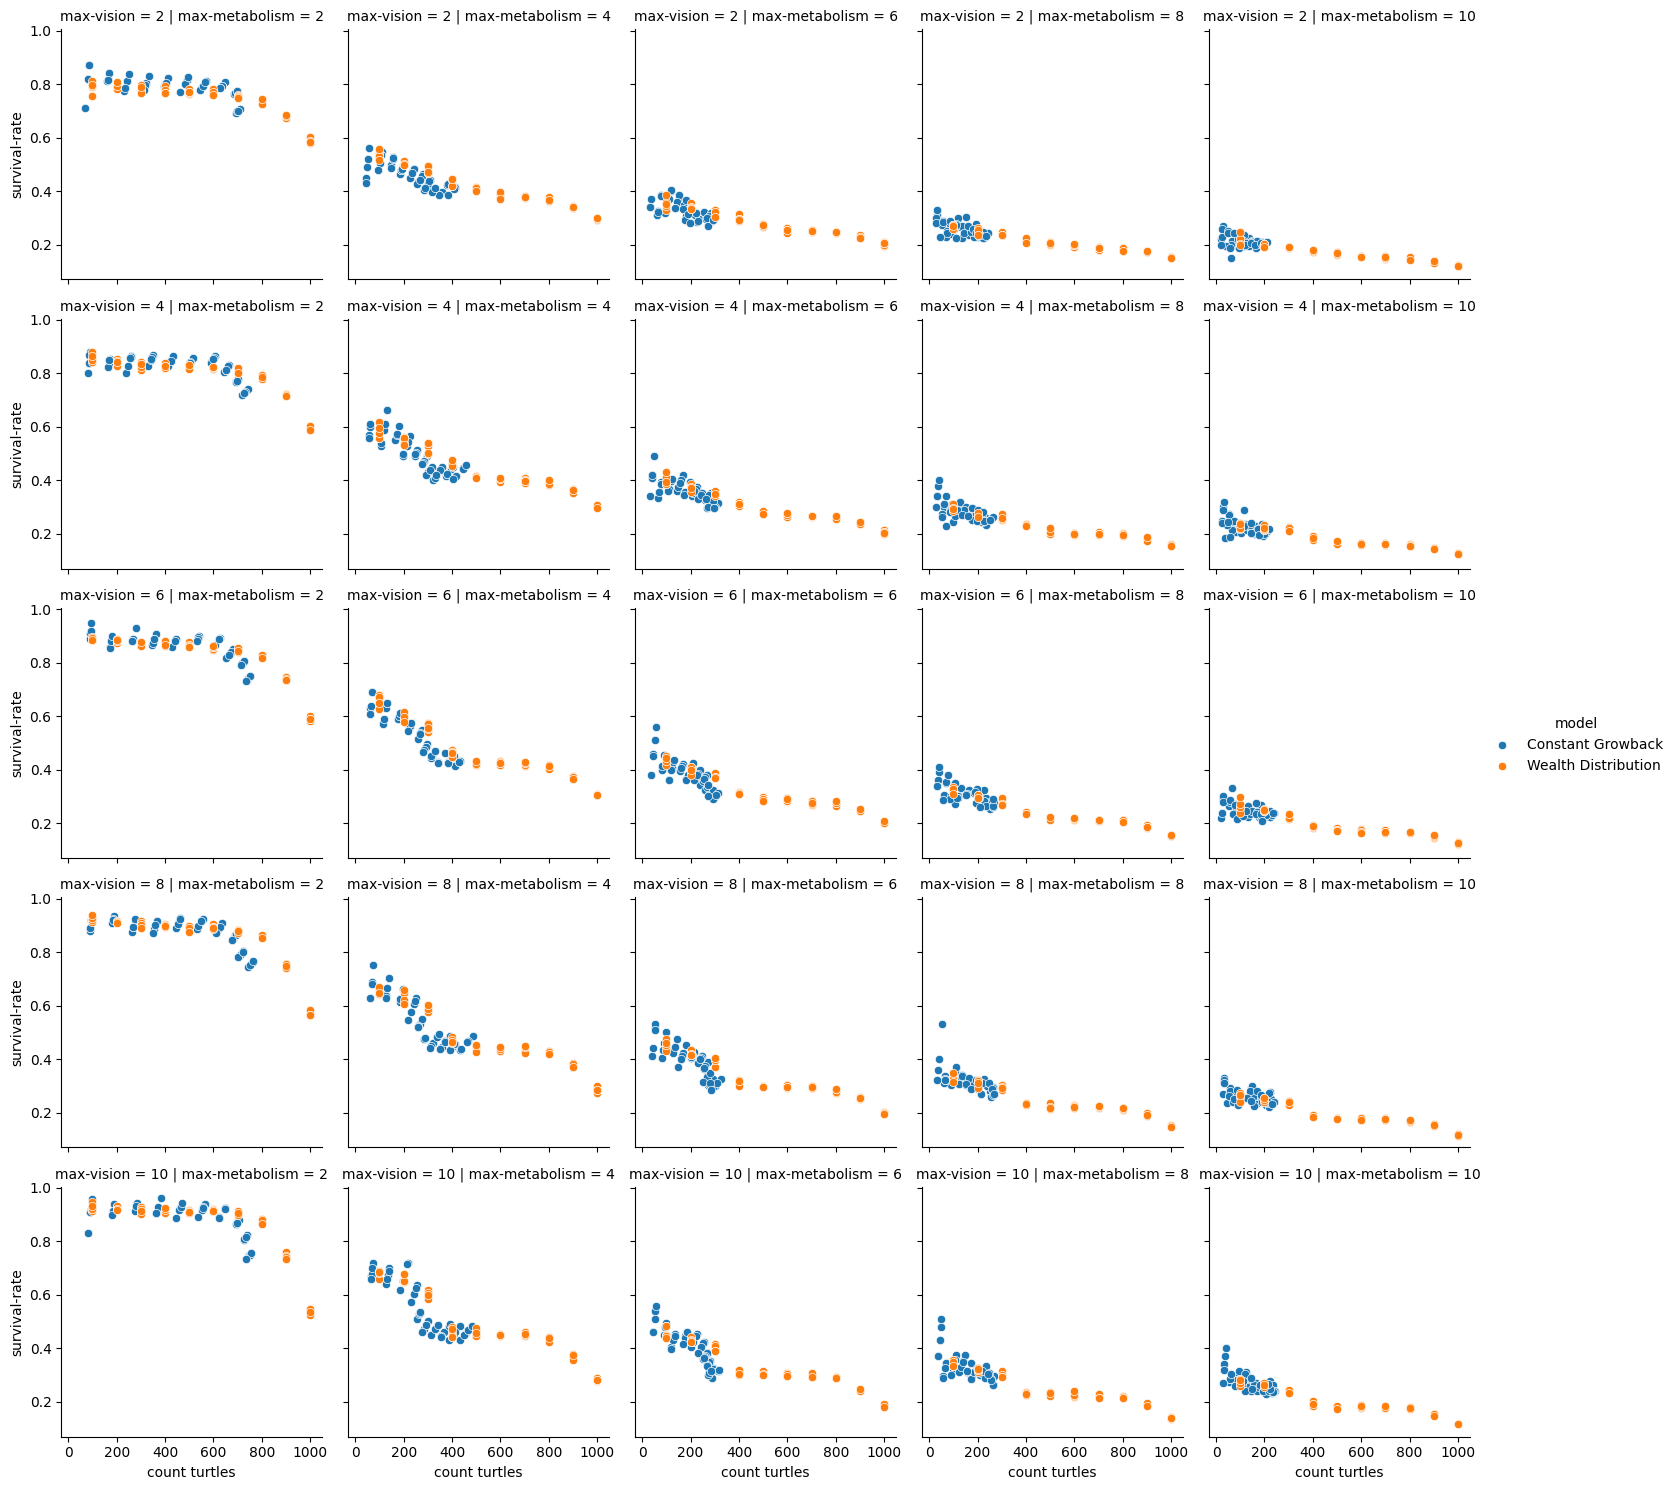

In [21]:
# create survival rate plot for combined

# init grid
combined_survival_plot = sns.FacetGrid(
    combined_df,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'model'
)

# create scatter plot
combined_survival_plot.map(
    sns.scatterplot,
    'count turtles',
    'survival-rate'    
)

# add legend
combined_survival_plot.add_legend()

# show plot
plt.show()
